# **Importing All libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# **Reading the file**

In [2]:
file_path = "../input/loan-approval-classification-data/loan_data.csv"
df = pd.read_csv(file_path)

# **EDA**

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info

<bound method DataFrame.info of        person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1        

In [5]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


shape of the file: 45000 row and 14 colums

In [7]:
df.shape

(45000, 14)

# **Checking duplicate value**

In [8]:
# Check if there are any duplicates left
duplicate_count = df.duplicated().sum()

# Display final check
if duplicate_count == 0:
    print("No duplicate values in the dataset.")
else:
    print(f"Total duplicate values remaining: {duplicate_count}")

No duplicate values in the dataset.


# **Distribution of data only in numeric colums**

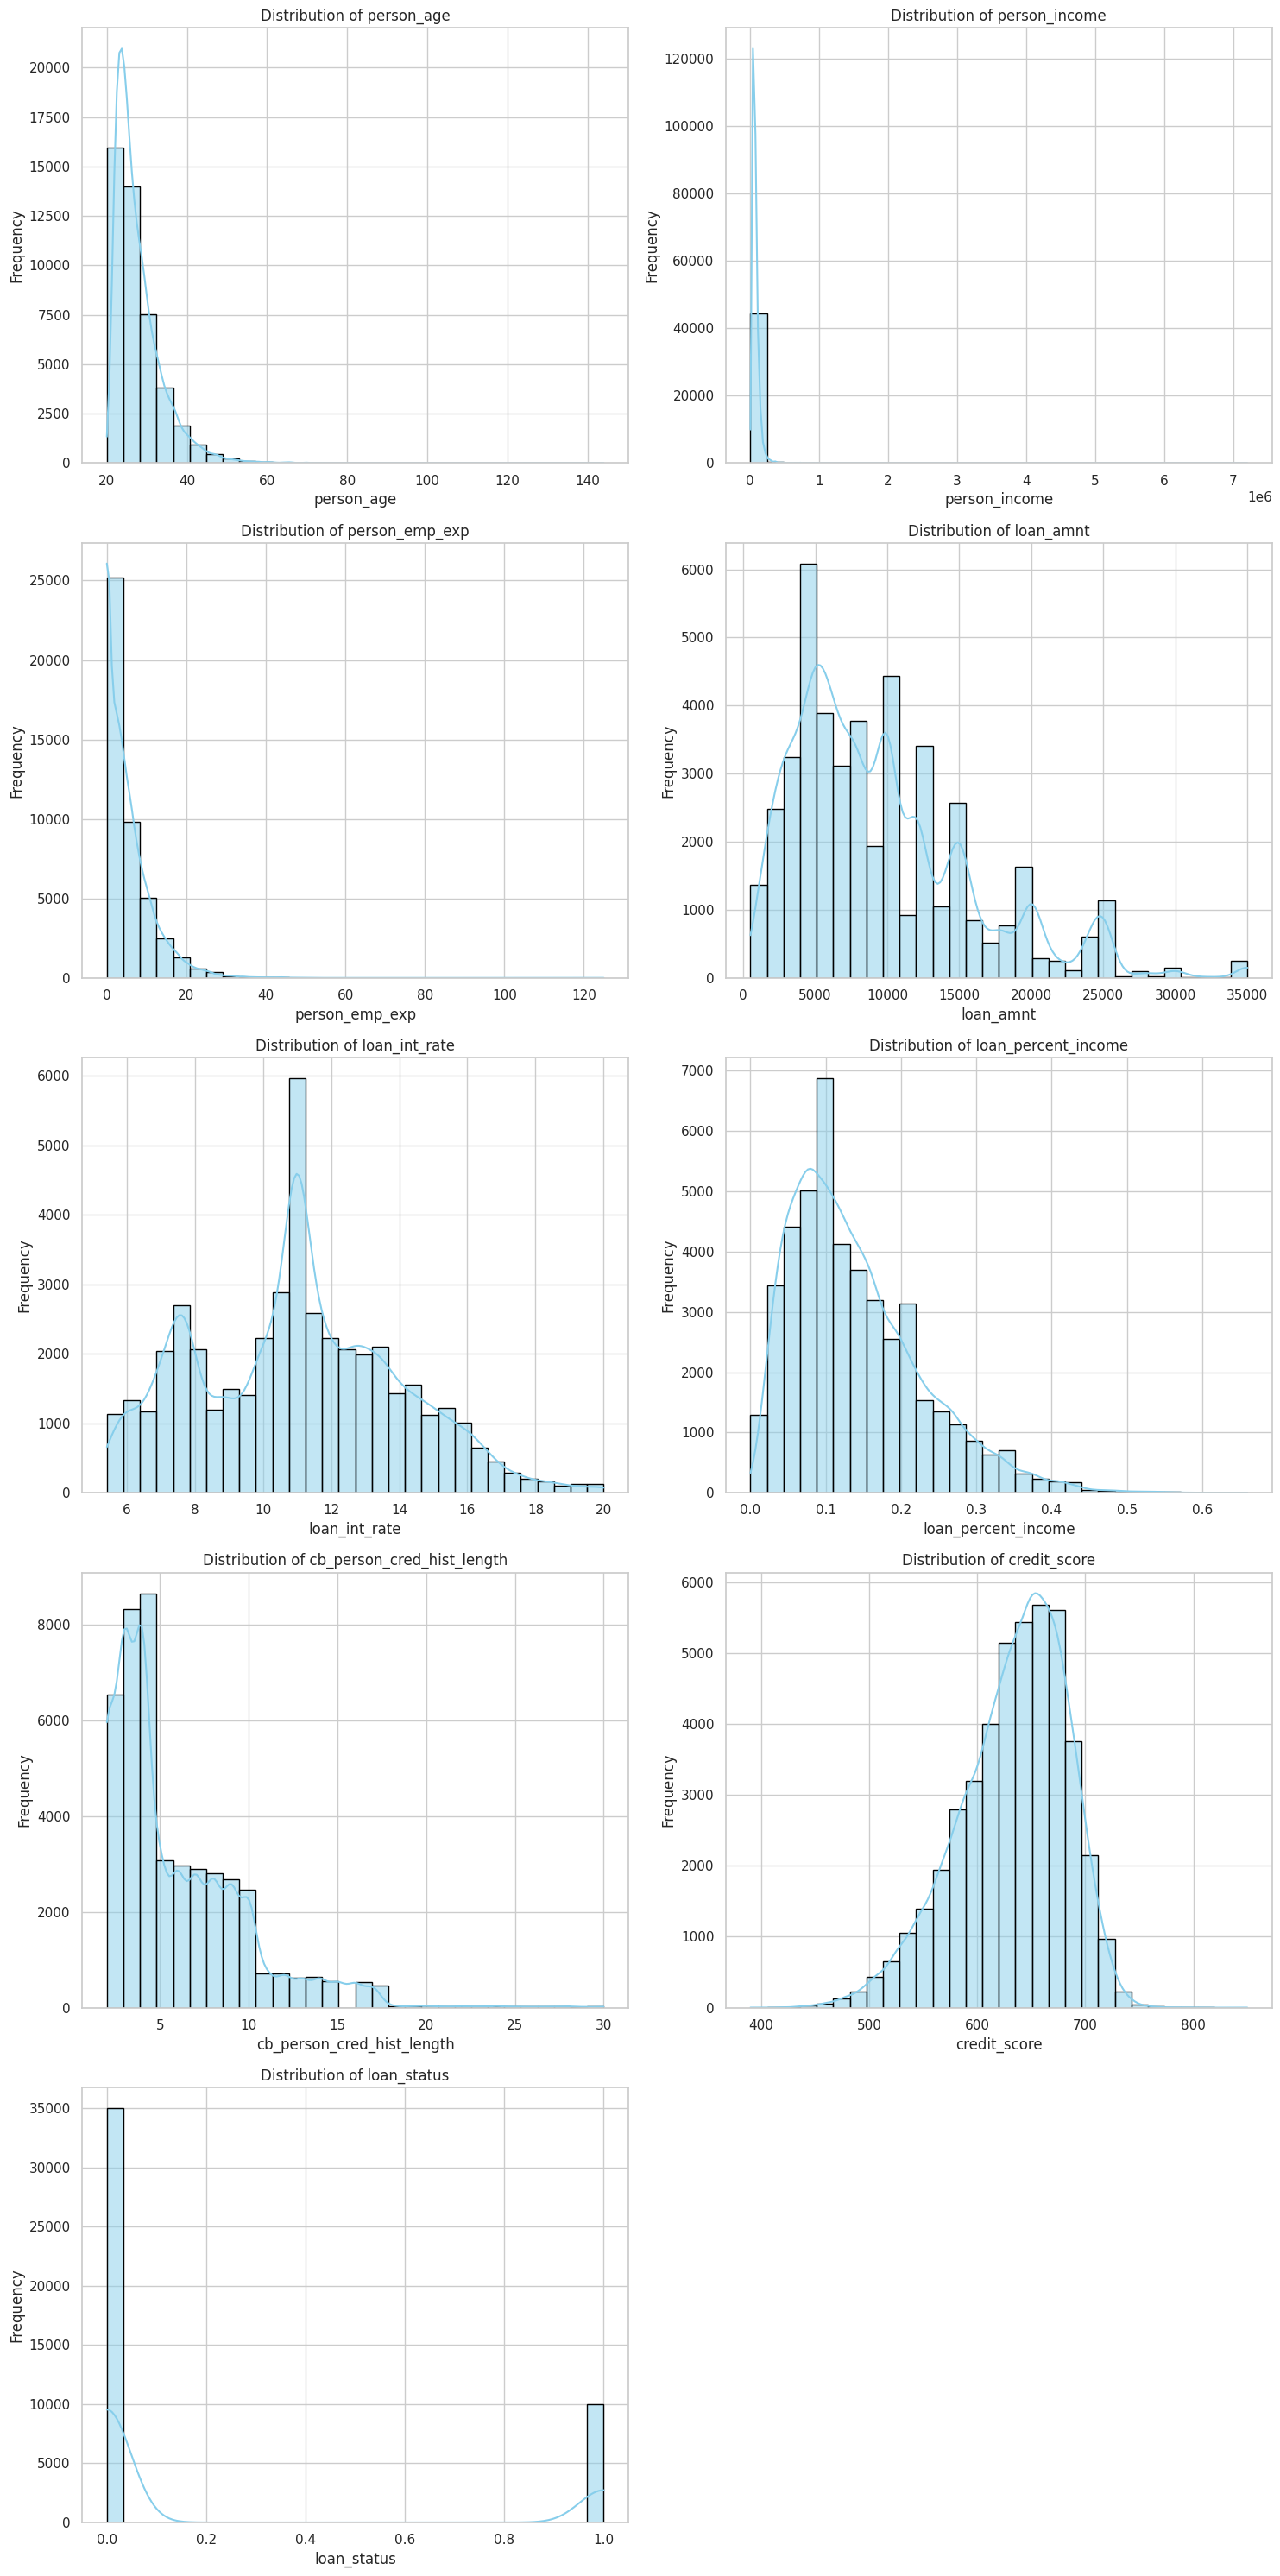

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Assuming your dataframe is 'df'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set style
sns.set(style="whitegrid")

# Determine the grid size dynamically
num_cols = len(numeric_cols)
rows = (num_cols + 1) // 2  # Calculate the number of rows for subplots (2 per row)

# Create subplots
fig, axs = plt.subplots(rows, 2, figsize=(15, 6 * rows))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Iterate over numeric columns and plot
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axs[i], color='skyblue', edgecolor='black')
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()


# **Correlation only for the numeric values with loan status**

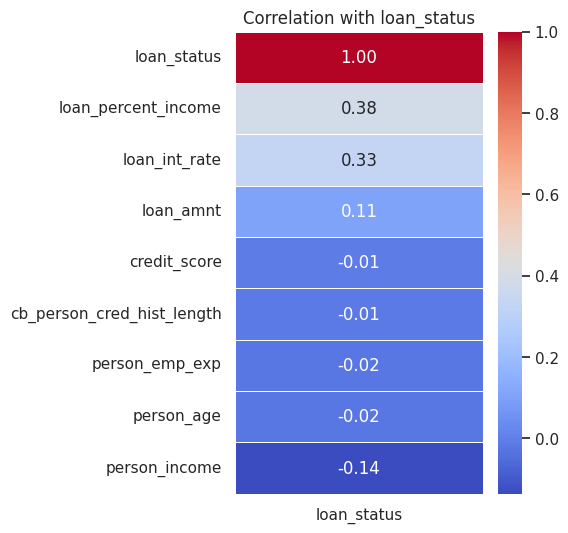

In [10]:
# Extract only the numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Extract correlation values with respect to the target variable ('loan_status')
target_variable = 'loan_status'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plotting the heatmap for correlation values with respect to the target variable
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

# **Data Scaling and Encoding**

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Split the features into categorical and numerical
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('loan_status')

# Standard scaling for numerical features only
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_features])

# Label encoding for categorical features only
label_encoders = {}
encoded_categorical_data = []

for feature in categorical_features:
    le = LabelEncoder()
    encoded_col = le.fit_transform(df[feature])
    label_encoders[feature] = le  # Store LabelEncoder for each feature
    encoded_categorical_data.append(encoded_col)

# Stack the scaled numerical and encoded categorical data
encoded_categorical_data = np.array(encoded_categorical_data).T
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data])

# Combine into DataFrame
final_columns = numerical_features.tolist() + categorical_features.tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

final_df['loan_status'] = df['loan_status']

final_df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
0,-0.953538,-0.104090,-0.892284,4.024953,1.683039,4.016394,-0.739109,-1.419814,0.0,4.0,3.0,4.0,0.0,1
1,-1.118963,-0.846005,-0.892284,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,0.0,3.0,2.0,1.0,1.0,0
2,-0.457264,-0.844065,-0.397517,-0.646600,0.625557,3.443074,-0.739109,0.047412,0.0,3.0,0.0,3.0,0.0,1
3,-0.788113,-0.007039,-0.892284,4.024953,1.417829,3.443074,-0.996863,0.840507,0.0,1.0,3.0,3.0,0.0,1
4,-0.622689,-0.176371,-0.727362,4.024953,1.095549,4.475050,-0.481354,-0.924130,1.0,4.0,3.0,3.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,-0.402231,0.097249,0.857799,1.562184,1.952442,-0.739109,0.245686,1.0,0.0,3.0,3.0,0.0,1
44996,1.527834,-0.180537,1.911393,-0.092348,1.028407,0.003155,1.322928,-0.230171,0.0,0.0,3.0,2.0,0.0,1
44997,0.866135,-0.290681,0.262171,-1.078758,-0.331212,-1.028821,1.065174,0.701716,1.0,0.0,3.0,0.0,0.0,1
44998,0.204436,-0.586348,-0.232595,0.382726,0.746412,2.525762,0.034155,-0.567237,1.0,1.0,3.0,1.0,0.0,1


# **Removing outlier**

In [12]:
import pandas as pd
from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = final_df.apply(zscore)

# Define threshold for Z-scores
threshold = 3

# Filter out rows where any column has a Z-score greater than the threshold
final_df = final_df[(z_scores < threshold).all(axis=1)]

final_df.shape

(42997, 14)

# **Correlation Matrix**

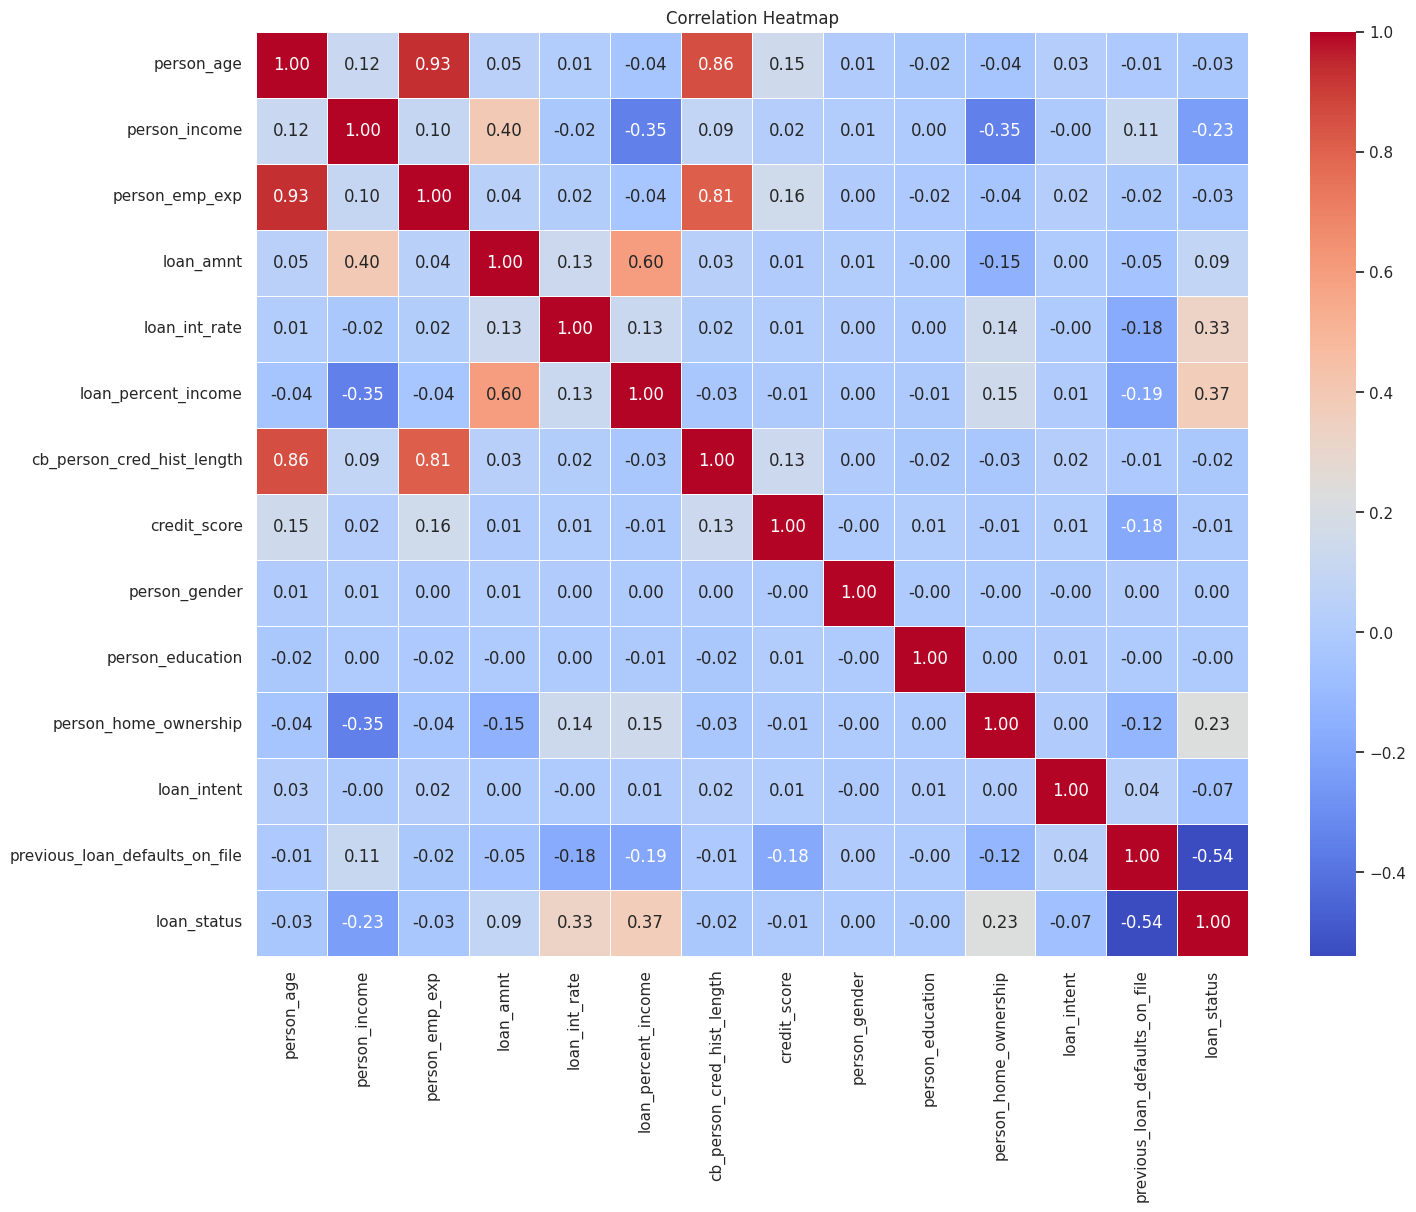

In [13]:
corr_matrix = final_df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
final_df.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'person_gender', 'person_education',
       'person_home_ownership', 'loan_intent',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

# **Spliting Features and Output**

In [15]:
X = final_df.drop(['loan_status'], axis=1)
y = final_df['loan_status']

# **Train Test Split**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # **Model Train**

## Bagging 

In [17]:
##Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9255813953488372

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6742
           1       0.88      0.75      0.81      1858

    accuracy                           0.93      8600
   macro avg       0.91      0.86      0.88      8600
weighted avg       0.92      0.93      0.92      8600



In [18]:
##Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


# Initialize a BaggingClassifier with DecisionTreeClassifier
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators = 100,  # Number of trees in the ensemble
    random_state = 42,
    n_jobs = -1  # Use all processors for parallelization
)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"bagging_model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

bagging_model Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6742
           1       0.88      0.77      0.82      1858

    accuracy                           0.93      8600
   macro avg       0.91      0.87      0.89      8600
weighted avg       0.92      0.93      0.92      8600



## Boosting

In [19]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size
    max_depth=3,  # Maximum depth of individual trees
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6742
           1       0.87      0.74      0.80      1858

    accuracy                           0.92      8600
   macro avg       0.90      0.85      0.88      8600
weighted avg       0.92      0.92      0.92      8600



In [20]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6742
           1       0.87      0.74      0.80      1858

    accuracy                           0.92      8600
   macro avg       0.90      0.85      0.87      8600
weighted avg       0.92      0.92      0.92      8600



## Stacking

In [21]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fea...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [22]:
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

Stacking Model Accuracy: 0.9318604651162791


## Stacking with trained model

In [23]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier


# Define base models
base_learners = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)
]

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fea...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [24]:
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

Stacking Model Accuracy: 0.923953488372093


# Voting

In [25]:
from sklearn.neighbors import KNeighborsClassifier
base_classifiers=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True))
    ]


hard_voting = VotingClassifier(estimators=base_classifiers, voting='hard')

# Soft Voting Classifier
soft_voting = VotingClassifier(estimators=base_classifiers, voting='soft')

# Fit the classifiers
hard_voting.fit(X_train, y_train)
soft_voting.fit(X_train, y_train)

# Predictions
y_pred_hard = hard_voting.predict(X_test)
y_pred_soft = soft_voting.predict(X_test)

# Evaluate the models
hard_voting_accuracy = accuracy_score(y_test, y_pred_hard)
soft_voting_accuracy = accuracy_score(y_test, y_pred_soft)

print(f"Hard Voting Accuracy: {hard_voting_accuracy:.2f}")
print(f"Soft Voting Accuracy: {soft_voting_accuracy:.2f}")

Hard Voting Accuracy: 0.91
Soft Voting Accuracy: 0.92


# **Evaluation**

In [26]:
print('bagging')
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(f"bagging_model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print('boosting')
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.2f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print('stacking')
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))
print('voting')
print(f"Hard Voting Accuracy: {hard_voting_accuracy:.2f}")
print(f"Soft Voting Accuracy: {soft_voting_accuracy:.2f}")

bagging
Random Forest Accuracy: 0.9255813953488372
bagging_model Accuracy: 0.92
boosting
Gradient Boosting Accuracy: 0.92
XGBoost Accuracy: 0.92
stacking
Stacking Model Accuracy: 0.923953488372093
voting
Hard Voting Accuracy: 0.91
Soft Voting Accuracy: 0.92


# **Cross validation**

In [27]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Random Forest": rf_model,
    "Gradient Boosting":gb_model,
    "Stacking":stacking_model,
    "Hard Voting":hard_voting,
     "Soft Voting":soft_voting
}

# Perform cross-validation and store results
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.9219 ± 0.0082
Gradient Boosting Cross-Validation Accuracy: 0.9201 ± 0.0069
Stacking Cross-Validation Accuracy: 0.9213 ± 0.0074
Hard Voting Cross-Validation Accuracy: 0.9148 ± 0.0085
Soft Voting Cross-Validation Accuracy: 0.9156 ± 0.0087


# **Visualizing cross validation result**

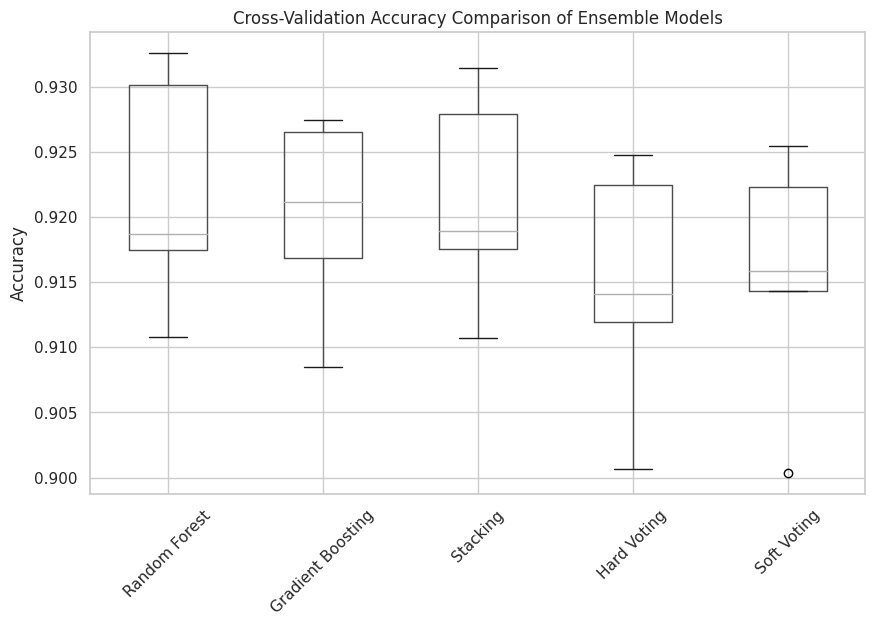

In [28]:
import matplotlib.pyplot as plt

# Prepare results for visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# **Confusion matrix for cross validation**

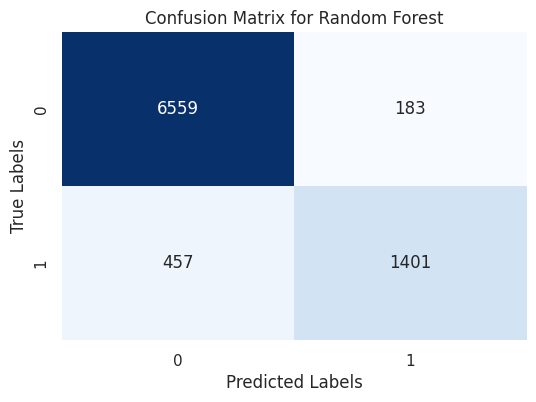

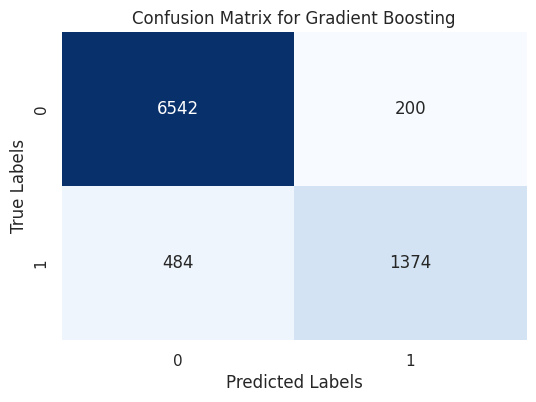

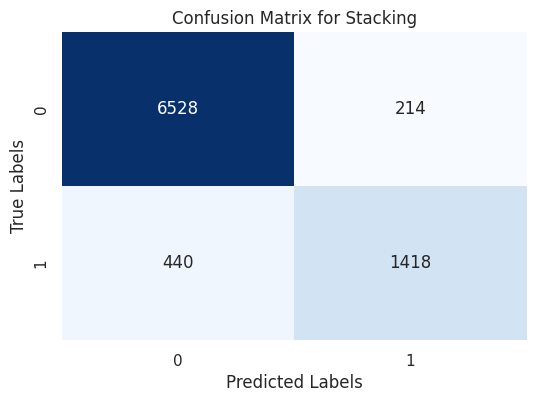

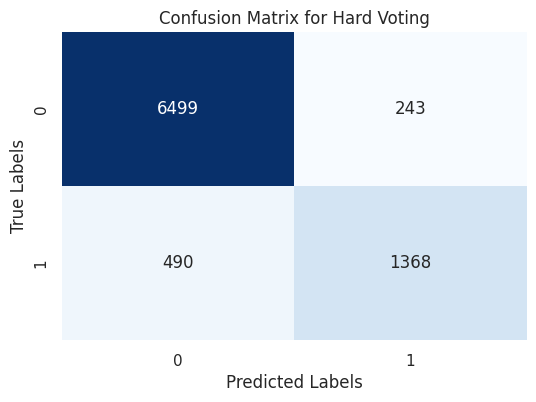

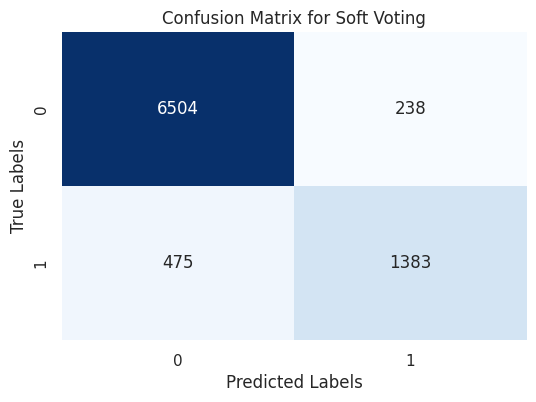

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit each model on the training data and plot the confusion matrix for each
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


# **Metrics summary**

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the model and predict on test set
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")


Random Forest Performance Metrics:
 - Precision: 0.9240
 - Recall: 0.9256
 - F1 Score: 0.9234

Gradient Boosting Performance Metrics:
 - Precision: 0.9185
 - Recall: 0.9205
 - F1 Score: 0.9180

Stacking Performance Metrics:
 - Precision: 0.9222
 - Recall: 0.9240
 - F1 Score: 0.9221

Hard Voting Performance Metrics:
 - Precision: 0.9124
 - Recall: 0.9148
 - F1 Score: 0.9125

Soft Voting Performance Metrics:
 - Precision: 0.9149
 - Recall: 0.9171
 - F1 Score: 0.9150



In [31]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)

# Display the summary
print("Model Performance Summary:")
metrics_df

Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.925581,0.923976,0.925581,0.923360
1,Gradient Boosting,0.920465,0.918544,0.920465,0.917995
2,Stacking,0.923953,0.922167,0.923953,0.922118
3,Hard Voting,0.914767,0.912449,0.914767,0.912500
4,Soft Voting,0.917093,0.914922,0.917093,0.914985


# **Finding Best Model**

In [32]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_summary)

# Identify the best model based on F1 Score (or any preferred metric)
best_model_row = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
best_model_name = best_model_row['Model']

print("Best Model : \n")
best_model_row

Best Model : 



Model        Random Forest
Accuracy          0.925581
Precision         0.923976
Recall            0.925581
F1 Score           0.92336
Name: 0, dtype: object

# **Applying Shap**

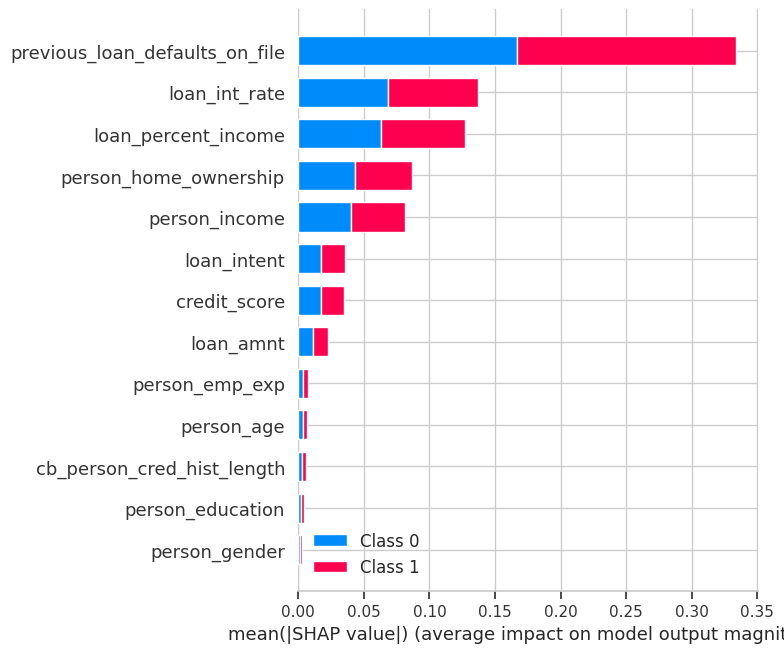

In [33]:
import shap

# Initialize SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# **Applying Lime**

In [34]:
!pip install lime

In [35]:
from lime.lime_tabular import LimeTabularExplainer
# Initialize LIME Tabular Explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Pass the training data as NumPy array
    training_labels=y_train.values,
    feature_names=X.columns,
    class_names=["Not Approved", "Approved"],  # Adjust class names as needed
    mode="classification"
)

# Pick an instance to explain (e.g., the first test sample)
idx = 0
instance = X_test.iloc[idx].values  # Get the test instance as a NumPy array

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(instance, rf_model.predict_proba)

# Display the explanation in a notebook
explanation.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
